### Dataframe creation

In [84]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot

In [85]:
y_201501= pd.read_csv('2015.csv')
y_2015=pd.DataFrame(y_201501)
y_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [86]:
y_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

As we can observe, the countries are divided into regions too. The variables that will help predicting Happiness Score and hence Happiness Rank are:
1. Standard Error
1. Economy (GDP per Capita)
1. Family
1. Health (Life Expectancy)
1. Trust (Government Corruption)
1. Generosity
1. Dystopia Residual

In [87]:
y_2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


### Data Cleaning.

In [88]:
y_2015=y_2015.rename(columns={'Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Trust','Happiness Score':'Score','Dystopia Residual':'Dystopia','Happiness Rank':'Rank' })

Renaming columns for convenience.

In [89]:
y_2015.isnull().values.any()

False

Since the entire dataframe does not have any missing values, therefore, we do not need to use fillna() function

In [90]:
y_2015.shape

(158, 12)

### EDA

In [91]:
y_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         158 non-null    object 
 1   Region          158 non-null    object 
 2   Rank            158 non-null    int64  
 3   Score           158 non-null    float64
 4   Standard Error  158 non-null    float64
 5   Economy         158 non-null    float64
 6   Family          158 non-null    float64
 7   Health          158 non-null    float64
 8   Freedom         158 non-null    float64
 9   Trust           158 non-null    float64
 10  Generosity      158 non-null    float64
 11  Dystopia        158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


We can see that the variables have only float, integer and object type data values.
Also, we can observe that no variable column has missing values.

In [92]:
y_2015.describe()

,Rank,Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We can observe that for the variables we have here, the mean and the median do not differ much. This shows us that there are not many outliers in the dataset.

In [93]:
compare=pd.DataFrame(y_2015[["Score","Economy","Family","Health","Freedom","Trust","Generosity","Dystopia"]])
compare.describe()

,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Made a new dataframe called 'compare' which contains only important variables in predicting the Happiness Score.

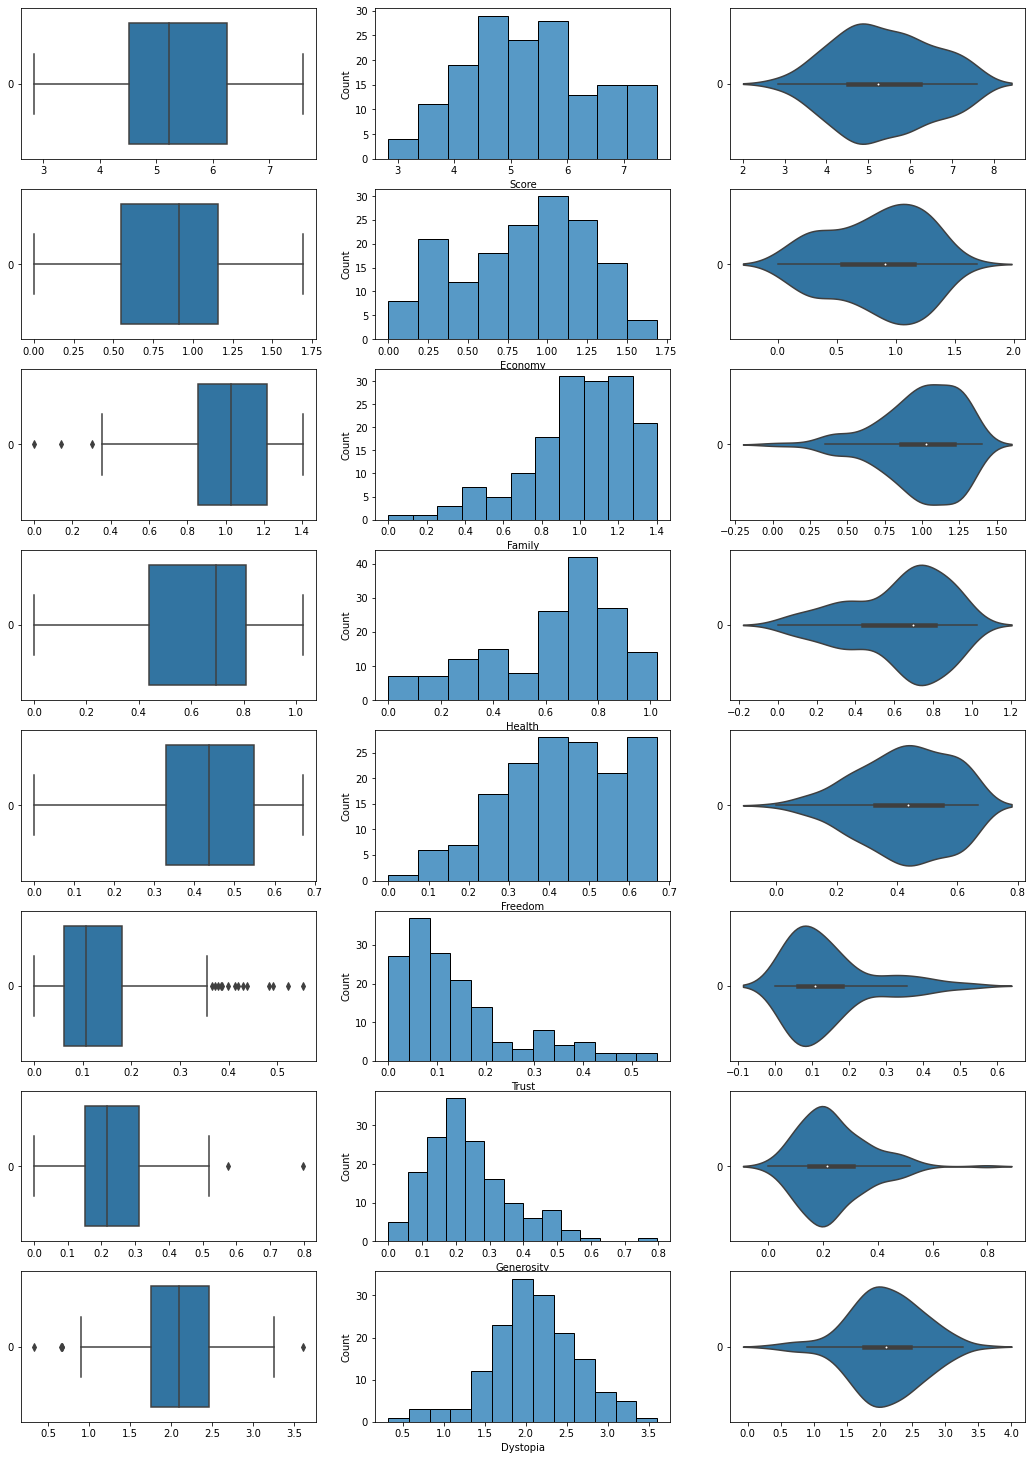

In [94]:
# Draw the distributions of all variables
f, axes = plt.subplots(8, 3, figsize=(18, 26))

count = 0
for var in compare:
    sb.boxplot(data = compare[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = compare[var], ax = axes[count,1])
    sb.violinplot(data = compare[var], orient = "h", ax = axes[count,2])
    count += 1
    

The medain happiness score is just above 5.
Many countries have a GDP per capita of around 1.
Median family is above 1.
Perceived corruption has the most outliers. Also, perceived corruption has the least outliers


In [95]:
compare.corr()

,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
Score,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Economy,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

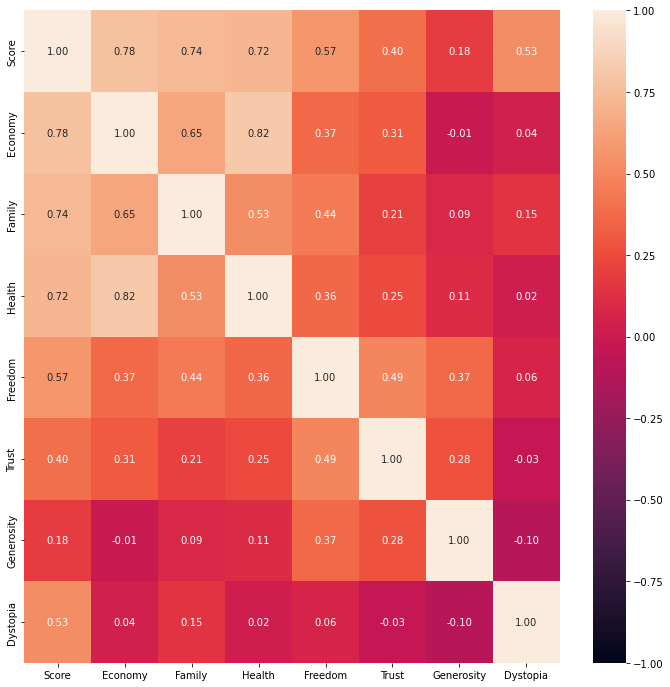

In [96]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(compare.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

We can see that economy has the highest coreelation with happiness score.

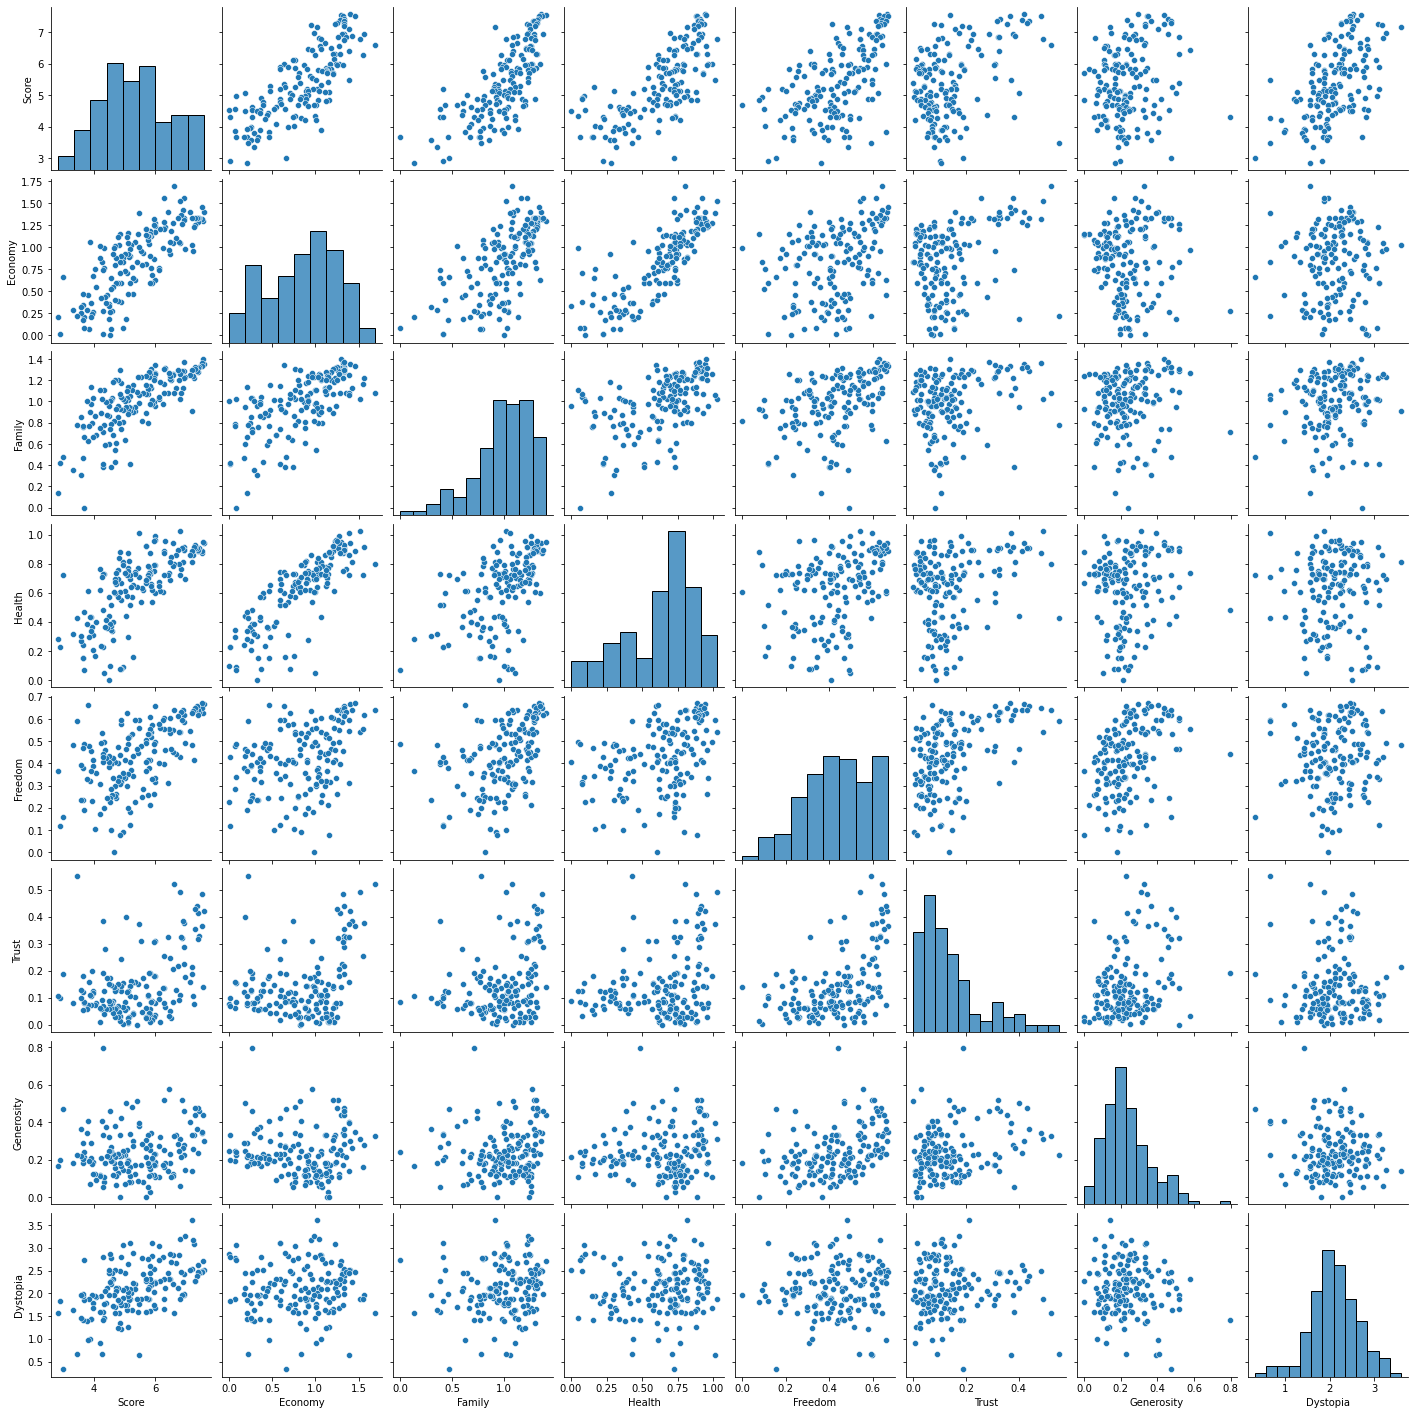

In [97]:
sb.pairplot(data = compare)

The 

In [98]:
compare2=pd.DataFrame(y_2015[["Region","Score","Economy","Family","Health","Freedom","Trust","Generosity","Dystopia"]])
compare2.groupby(by="Region").mean()

,Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia
Region,,,,,,,,
Australia and New Zealand,7.285000,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,5.626167,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,5.406900,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,7.273000,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,5.317444,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,4.580857,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,4.202800,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [99]:
def world_map_plot(year):
    d = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        marker_line_width = 1,
        locations = y_2015['Country'],
        locationmode = 'country names',
        z = y_2015["Score"],
        text = y_2015["Country"],
        colorbar = {'title' : "Score"}
    )
    layout = dict(title = f'Happiness Map {year}',
                geo = dict(projection = {'type' : 'mercator'}, showocean = False, showlakes=True, showrivers=True))

    choromap = go.Figure(data=[d], layout=layout)

    choromap.update_layout(autosize=False, width=800, height=800)

    iplot(choromap, validate=False)

In [100]:
world_map_plot('2015')


This is the geographic plot for Happiness Score. The oceans are made white for better contrast.

In [101]:
def world_map_plot(year):
    d = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        marker_line_width = 1,
        locations = y_2015['Country'],
        locationmode = 'country names',
        z = y_2015["Economy"],
        text = y_2015["Country"],
        colorbar = {'title' : "Economy"}
    )
    layout = dict(title = f'Happiness Map {year}',
                geo = dict(projection = {'type' : 'mercator'}, showocean = False, showlakes=True, showrivers=True))

    choromap = go.Figure(data=[d], layout=layout)

    choromap.update_layout(autosize=False, width=800, height=800)

    iplot(choromap, validate=False)

In [102]:
world_map_plot('2015')

This is the geographic plot for Economy.

In [103]:
def world_map_plot(year):
    d = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        marker_line_width = 1,
        locations = y_2015['Country'],
        locationmode = 'country names',
        z = y_2015["Family"],
        text = y_2015["Country"],
        colorbar = {'title' : "Family"}
    )
    layout = dict(title = f'Happiness Map {year}',
                geo = dict(projection = {'type' : 'mercator'}, showocean = False, showlakes=True, showrivers=True))

    choromap = go.Figure(data=[d], layout=layout)

    choromap.update_layout(autosize=False, width=800, height=800)

    iplot(choromap, validate=False)

In [104]:
world_map_plot('2015')

This is the geographic plot for Family.

In [105]:
def world_map_plot(year):
    d = dict(
        type = 'choropleth',
        colorscale = 'Viridis',
        marker_line_width = 1,
        locations = y_2015['Country'],
        locationmode = 'country names',
        z = y_2015["Health"],
        text = y_2015["Country"],
        colorbar = {'title' : "Health"}
    )
    layout = dict(title = f'Happiness Map {year}',
                geo = dict(projection = {'type' : 'mercator'}, showocean = False, showlakes=True, showrivers=True))

    choromap = go.Figure(data=[d], layout=layout)

    choromap.update_layout(autosize=False, width=800, height=800)

    iplot(choromap, validate=False)

In [106]:
world_map_plot('2015')

This is the geographic plot for Health.